<a href="https://colab.research.google.com/github/nutworker/qM-AI-L/blob/L_test/Data_load_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install git
!git clone https://github.com/ryanzhumich/AESLC

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Cloning into 'AESLC'...
remote: Enumerating objects: 17469, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 17469 (delta 1), reused 0 (delta 0), pack-reused 17461
Receiving objects: 100% (17469/17469), 7.36 MiB | 5.64 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Updating files: 100% (18304/18304), done.


In [80]:
repository_url = 'https://github.com/nutworker/qM-AI-L'
!git clone {repository_url}

Cloning into 'qM-AI-L'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 56 (delta 16), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (56/56), 1.03 MiB | 3.54 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [65]:
!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
# Importing Libraries

# Data Handling
import pandas as pd
import tensorflow as tf
import numpy as np

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import display
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# # Statistics & Mathematics
# import scipy.stats as stats
# # import statsmodels.api as sm
# from scipy.stats import shapiro, skew, anderson, kstest, gaussian_kde,spearmanr
# import math

# Hiding warnings
import warnings
warnings.filterwarnings("ignore")

In [57]:
!pip install matplotlib
import matplotlib.pyplot as plt

!pip install langchain_community

In [2]:
import os
import re
import pandas as pd


In [6]:
from langchain_community.document_loaders.blob_loaders import FileSystemBlobLoader
from langchain_community.document_loaders import DirectoryLoader

In [7]:
from langchain.document_loaders.text import TextLoader


In [8]:
seed = 42
colormap = 'cividis'
template = 'plotly_dark'

In [9]:
#Function to get folder lenghts

def get_folder_lengths(base_folder):
    folder_lengths = {}
    for folder_name in os.listdir(base_folder):
        folder_path = os.path.join(base_folder, folder_name)
        if os.path.isdir(folder_path):
            num_files = len(os.listdir(folder_path))
            folder_lengths[folder_name] = num_files
    return folder_lengths


In [10]:
# Check size of raw datafiles

base_folder = '/content/AESLC/enron_subject_line'
folder_lengths = get_folder_lengths(base_folder)

for folder, length in folder_lengths.items():
    print(f"The folder '{folder}' contains {length} files.")

The folder 'test' contains 1906 files.
The folder 'dev' contains 1960 files.
The folder 'train' contains 14436 files.


In [89]:
train_path = '/content/AESLC/enron_subject_line/train'
test_path = '/content/AESLC/enron_subject_line/test'
dev_path = '/content/AESLC/enron_subject_line/dev'

In [14]:
train_loader = DirectoryLoader(path=train_path, glob="**/*.subject", silent_errors=True, show_progress=True, loader_cls=TextLoader)

In [15]:
train_loader

In [16]:
email_docs = train_loader.load()

100%|██████████| 14436/14436 [00:01<00:00, 13058.58it/s]


In [17]:
len(email_docs), type(email_docs)

(14436, list)

In [18]:
email_docs[0]

Document(metadata={'source': '/content/AESLC/enron_subject_line/train/delainey-d_sent_596.subject'}, page_content='Tim, in the east power group and the gas groups, we are trying to build a  mid-market capability(deal flow, information and coverage) consistent with  the largest energy merchant in N.A..\nPlease see tha attached.\nI would be curious to talk to you about your  structure, coverage functions and market building iniatives.\nI recognize that you and your group have been the most effective and  proactive group in these areas for some time.\nIs there areas where we could  be more aggressive or proactive?\nCan I get you more resources to cover the  market more aggresively?\nLets discuss.\nRegards\n\n@subject\nEast Power Mid-Market Org. Chart')

In [19]:
email_docs[0].page_content

'Tim, in the east power group and the gas groups, we are trying to build a  mid-market capability(deal flow, information and coverage) consistent with  the largest energy merchant in N.A..\nPlease see tha attached.\nI would be curious to talk to you about your  structure, coverage functions and market building iniatives.\nI recognize that you and your group have been the most effective and  proactive group in these areas for some time.\nIs there areas where we could  be more aggressive or proactive?\nCan I get you more resources to cover the  market more aggresively?\nLets discuss.\nRegards\n\n@subject\nEast Power Mid-Market Org. Chart'

In [20]:
email_docs[0].metadata,

({'source': '/content/AESLC/enron_subject_line/train/delainey-d_sent_596.subject'},)

In [21]:
email_docs[0].metadata['source']

'/content/AESLC/enron_subject_line/train/delainey-d_sent_596.subject'

In [22]:
text_data = [doc.page_content for doc in email_docs]

In [23]:
text_data[0]

'Tim, in the east power group and the gas groups, we are trying to build a  mid-market capability(deal flow, information and coverage) consistent with  the largest energy merchant in N.A..\nPlease see tha attached.\nI would be curious to talk to you about your  structure, coverage functions and market building iniatives.\nI recognize that you and your group have been the most effective and  proactive group in these areas for some time.\nIs there areas where we could  be more aggressive or proactive?\nCan I get you more resources to cover the  market more aggresively?\nLets discuss.\nRegards\n\n@subject\nEast Power Mid-Market Org. Chart'

In [91]:
def load_and_process_directory(directory_path):
    # Initialize the DirectoryLoader
    train_loader = DirectoryLoader(path=directory_path, glob="**/*.subject", silent_errors=True, show_progress=True, loader_cls=TextLoader)
    email_docs = train_loader.load()

    # Extract and process content from documents
    data = []

    for doc in email_docs:
      extracted_parts = split_text_into_parts(doc.page_content)
      for part in extracted_parts:
          data.append({
              'source': extract_file_name(doc.metadata.get('source', 'unknown')),
              'tag': part.get('tag', 'body'),
              'content': part['content']
          })


    # Create DataFrame
    df = pd.DataFrame(data)

    return df

In [25]:
def extract_lines_with_symbol(text, symbol):
    # Find all lines starting with the symbol and extract the tag and content
    pattern = re.compile(rf'^{re.escape(symbol)}(\w+)\n(.*)', re.MULTILINE)
    matches = pattern.findall(text)

    return {tag: content.strip() for tag, content in matches}

In [26]:
text_data[2]

"i can't wait till dinner!!!!!\nit is going to be so good.\nmom wants u to  e-mail my soccer coach that we can't make it on sunday....thats all                                                                       Justin\n\n@subject\n(no subject)"

In [27]:
#
def split_text_into_parts(text):
    # Split the text into parts as per the criteria
    pattern = re.compile(r'(@\w+)\n')
    parts = pattern.split(text)

    result = []
    current_part = {'tag': 'body', 'content': parts[0].strip()}
    result.append(current_part)

    for i in range(1, len(parts), 2):
        tag = parts[i][1:]  # Remove the @ symbol
        content = parts[i + 1].strip() if i + 1 < len(parts) else ''
        result.append({'tag': tag, 'content': content})

    return result


In [28]:
split_text_into_parts(text_data[2])

[{'tag': 'body',
  'content': "i can't wait till dinner!!!!!\nit is going to be so good.\nmom wants u to  e-mail my soccer coach that we can't make it on sunday....thats all                                                                       Justin"},
 {'tag': 'subject', 'content': '(no subject)'}]

In [29]:
def extract_file_name(file_path):
    # Regex to extract the file name without the extension
    pattern = re.compile(r'/([^/]+)\.[^.]+$')
    match = pattern.search(file_path)
    if match:
        return match.group(1)
    return None

In [31]:
emails_df = load_and_process_directory(train_path)

100%|██████████| 14436/14436 [00:02<00:00, 5875.48it/s]


In [32]:
emails_df#.head(10)

,source,tag,content
0,delainey-d_sent_596,body,"Tim, in the east power group and the gas group..."
1,delainey-d_sent_596,subject,East Power Mid-Market Org. Chart
2,nemec-g_sent_2292,body,"Heather, Attached is the ash handling agreeme..."
3,nemec-g_sent_2292,subject,Ash Handling Agreement
4,haedicke-m_inbox_260,body,i can't wait till dinner!!!!!\nit is going to ...
...,...,...,...
28869,dasovich-j_sent_3635,subject,Class Video
28870,may-l_inbox_768,body,Good morning Larry!\nI just spoke to Tom P. to...
28871,may-l_inbox_768,subject,Tom @ GFI
28872,mann-k_sent_1243,body,"Hi Dale, I thought I'd send this along.\nIt i..."


In [33]:
emails_df['tag'].unique()

array(['body', 'subject', 'EES', 'ENRON_DEVELOPMENT'], dtype=object)

In [34]:
emails_df

,source,tag,content
0,delainey-d_sent_596,body,"Tim, in the east power group and the gas group..."
1,delainey-d_sent_596,subject,East Power Mid-Market Org. Chart
2,nemec-g_sent_2292,body,"Heather, Attached is the ash handling agreeme..."
3,nemec-g_sent_2292,subject,Ash Handling Agreement
4,haedicke-m_inbox_260,body,i can't wait till dinner!!!!!\nit is going to ...
...,...,...,...
28869,dasovich-j_sent_3635,subject,Class Video
28870,may-l_inbox_768,body,Good morning Larry!\nI just spoke to Tom P. to...
28871,may-l_inbox_768,subject,Tom @ GFI
28872,mann-k_sent_1243,body,"Hi Dale, I thought I'd send this along.\nIt i..."


In [36]:
train_df = emails_df.pivot(index='source', columns='tag', values='content').reset_index()

In [38]:
train_df

tag,source,EES,ENRON_DEVELOPMENT,body,subject
0,allen-p_inbox_20,NaN,NaN,"Greg/Phillip, Attached is the Grande Communic...",Service Agreement
1,allen-p_inbox_28,NaN,NaN,Phillip & Keith Attached is the first draw re...,Bishops Corner
2,allen-p_inbox_63,NaN,NaN,Your Internet Banking accounts are now setup a...,Internet Banking
3,allen-p_inbox_64,NaN,NaN,To our IBS Customers that are still hanging in...,Internet Banking
4,allen-p_inbox_65,NaN,NaN,Phillip Good Morning!\nI hope you had a wonder...,SMEs for expert stories
...,...,...,...,...,...
14431,zufferli-j_inbox_43,NaN,NaN,This email is acknowledgement from the Power P...,Power Pool
14432,zufferli-j_inbox_44,NaN,NaN,This email is acknowledgement from the Power P...,Power Pool of Alberta
14433,zufferli-j_inbox_46,NaN,NaN,"John, Further to the voice message that I lef...",Enron Security
14434,zufferli-j_inbox_8,NaN,NaN,Make sure that all curves are downloaded by th...,Simulation Curves


In [39]:
desired_columns = ['source', 'body', 'subject', 'ann0', 'ann1', 'ann2']
train_df = train_df.reindex(columns=desired_columns)
train_df

tag,source,body,subject,ann0,ann1,ann2
0,allen-p_inbox_20,"Greg/Phillip, Attached is the Grande Communic...",Service Agreement,NaN,NaN,NaN
1,allen-p_inbox_28,Phillip & Keith Attached is the first draw re...,Bishops Corner,NaN,NaN,NaN
2,allen-p_inbox_63,Your Internet Banking accounts are now setup a...,Internet Banking,NaN,NaN,NaN
3,allen-p_inbox_64,To our IBS Customers that are still hanging in...,Internet Banking,NaN,NaN,NaN
4,allen-p_inbox_65,Phillip Good Morning!\nI hope you had a wonder...,SMEs for expert stories,NaN,NaN,NaN
...,...,...,...,...,...,...
14431,zufferli-j_inbox_43,This email is acknowledgement from the Power P...,Power Pool,NaN,NaN,NaN
14432,zufferli-j_inbox_44,This email is acknowledgement from the Power P...,Power Pool of Alberta,NaN,NaN,NaN
14433,zufferli-j_inbox_46,"John, Further to the voice message that I lef...",Enron Security,NaN,NaN,NaN
14434,zufferli-j_inbox_8,Make sure that all curves are downloaded by th...,Simulation Curves,NaN,NaN,NaN


In [40]:
train_df['body']

0        Greg/Phillip,  Attached is the Grande Communic...
1        Phillip & Keith  Attached is the first draw re...
2        Your Internet Banking accounts are now setup a...
3        To our IBS Customers that are still hanging in...
4        Phillip Good Morning!\nI hope you had a wonder...
                               ...                        
14431    This email is acknowledgement from the Power P...
14432    This email is acknowledgement from the Power P...
14433    John,  Further to the voice message that I lef...
14434    Make sure that all curves are downloaded by th...
14435    John:  Do you need Accumap day one?\nCarmen sa...
Name: body, Length: 14436, dtype: object

In [41]:
len(train_df['body'][2].split())

250

In [44]:
train_df['body_wcount'] = [len(x.split()) for x in train_df['body']]

In [45]:
train_df['subj_wcount'] = [len(x.split()) for x in train_df['subject']]

In [46]:
train_df

tag,source,body,subject,ann0,ann1,ann2,body_wcount,subj_wcount
0,allen-p_inbox_20,"Greg/Phillip, Attached is the Grande Communic...",Service Agreement,NaN,NaN,NaN,65,2
1,allen-p_inbox_28,Phillip & Keith Attached is the first draw re...,Bishops Corner,NaN,NaN,NaN,145,2
2,allen-p_inbox_63,Your Internet Banking accounts are now setup a...,Internet Banking,NaN,NaN,NaN,250,2
3,allen-p_inbox_64,To our IBS Customers that are still hanging in...,Internet Banking,NaN,NaN,NaN,458,2
4,allen-p_inbox_65,Phillip Good Morning!\nI hope you had a wonder...,SMEs for expert stories,NaN,NaN,NaN,68,4
...,...,...,...,...,...,...,...,...
14431,zufferli-j_inbox_43,This email is acknowledgement from the Power P...,Power Pool,NaN,NaN,NaN,227,2
14432,zufferli-j_inbox_44,This email is acknowledgement from the Power P...,Power Pool of Alberta,NaN,NaN,NaN,277,4
14433,zufferli-j_inbox_46,"John, Further to the voice message that I lef...",Enron Security,NaN,NaN,NaN,148,2
14434,zufferli-j_inbox_8,Make sure that all curves are downloaded by th...,Simulation Curves,NaN,NaN,NaN,66,2


In [47]:
def extract_sentences(text):
    # Remove control characters
    text = re.sub(r'[\r\n\t]', ' ', text)

    # Split the text into sentences
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)

    # Clean each sentence
    cleaned_sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

    return cleaned_sentences

In [48]:
train_df['body'][0]

'Greg/Phillip,  Attached is the Grande Communications Service Agreement.\nThe business points can be found in Exhibit C.  I Can get the Non-Disturbance agreement after it has been executed by you and Grande.\nI will fill in the Legal description of the property one I have received it.\nPlease execute and send to:  Grande Communications, 401 Carlson Circle, San Marcos Texas, 78666 Attention Hunter Williams.\n<<Bishopscontract.doc>>'

In [49]:
extract_sentences(train_df['body'][0])

['Greg/Phillip,  Attached is the Grande Communications Service Agreement.',
 'The business points can be found in Exhibit C.',
 'I Can get the Non-Disturbance agreement after it has been executed by you and Grande.',
 'I will fill in the Legal description of the property one I have received it.',
 'Please execute and send to:  Grande Communications, 401 Carlson Circle, San Marcos Texas, 78666 Attention Hunter Williams.',
 '<<Bishopscontract.doc>>']

In [51]:
def remove_special_characters(text):
    # Remove all special characters except periods
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s.\n]', '', text)
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s.\n]', '', text)
    return cleaned_text

remove_special_characters(train_df['body'][0])

'GregPhillip  Attached is the Grande Communications Service Agreement.\nThe business points can be found in Exhibit C.  I Can get the NonDisturbance agreement after it has been executed by you and Grande.\nI will fill in the Legal description of the property one I have received it.\nPlease execute and send to  Grande Communications 401 Carlson Circle San Marcos Texas 78666 Attention Hunter Williams.\nBishopscontract.doc'

In [52]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters except periods and newlines
    text = re.sub(r'[^a-zA-Z0-9\s.\n]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text
clean_text(train_df['body'][0])

'gregphillip attached is the grande communications service agreement. the business points can be found in exhibit c. i can get the nondisturbance agreement after it has been executed by you and grande. i will fill in the legal description of the property one i have received it. please execute and send to grande communications 401 carlson circle san marcos texas 78666 attention hunter williams. bishopscontract.doc'

In [54]:
train_df['cleaned_emails'] = train_df['body'].apply(clean_text)

In [60]:
train_df

tag,source,body,subject,ann0,ann1,ann2,body_wcount,subj_wcount,cleaned_emails
0,allen-p_inbox_20,"Greg/Phillip, Attached is the Grande Communic...",Service Agreement,NaN,NaN,NaN,65,2,gregphillip attached is the grande communicati...
1,allen-p_inbox_28,Phillip & Keith Attached is the first draw re...,Bishops Corner,NaN,NaN,NaN,145,2,phillip keith attached is the first draw reque...
2,allen-p_inbox_63,Your Internet Banking accounts are now setup a...,Internet Banking,NaN,NaN,NaN,250,2,your internet banking accounts are now setup a...
3,allen-p_inbox_64,To our IBS Customers that are still hanging in...,Internet Banking,NaN,NaN,NaN,458,2,to our ibs customers that are still hanging in...
4,allen-p_inbox_65,Phillip Good Morning!\nI hope you had a wonder...,SMEs for expert stories,NaN,NaN,NaN,68,4,phillip good morning i hope you had a wonderfu...
...,...,...,...,...,...,...,...,...,...
14431,zufferli-j_inbox_43,This email is acknowledgement from the Power P...,Power Pool,NaN,NaN,NaN,227,2,this email is acknowledgement from the power p...
14432,zufferli-j_inbox_44,This email is acknowledgement from the Power P...,Power Pool of Alberta,NaN,NaN,NaN,277,4,this email is acknowledgement from the power p...
14433,zufferli-j_inbox_46,"John, Further to the voice message that I lef...",Enron Security,NaN,NaN,NaN,148,2,john further to the voice message that i left ...
14434,zufferli-j_inbox_8,Make sure that all curves are downloaded by th...,Simulation Curves,NaN,NaN,NaN,66,2,make sure that all curves are downloaded by th...


Text(0, 0.5, 'Frequency')

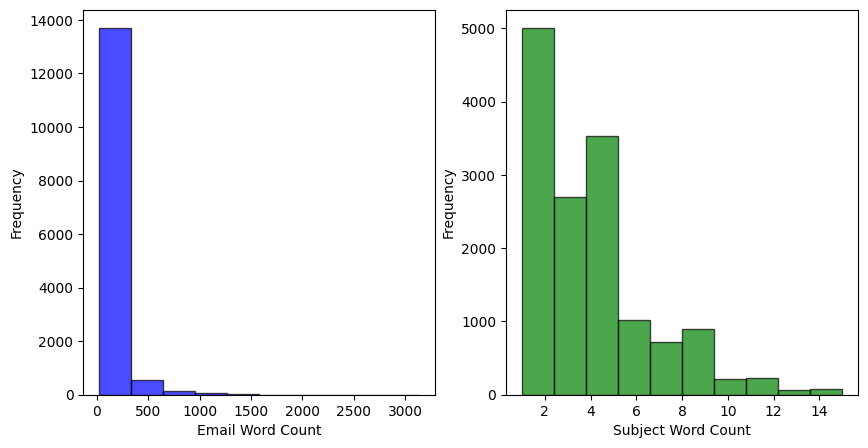

In [61]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(train_df['body_wcount'], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Email Word Count')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.hist(train_df['subj_wcount'], bins=10, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Subject Word Count')
plt.ylabel('Frequency')


In [62]:
def plot_correlation(df, title, dataset, width, height, fontsize):
    """
    Plot a heatmap of the correlation matrix for the given DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    title (str): Title of the plot.
    dataset (str): Name of the dataset.
    width (int): Width of the plot.
    height (int): Height of the plot.
    fontsize (int): Font size for the plot labels.
    """
    plt.figure(figsize=(width / 100, height / 100))
    corr = df.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title(f'{title} - {dataset}', fontsize=fontsize)
    plt.xticks(rotation=45, fontsize=fontsize-2)
    plt.yticks(rotation=0, fontsize=fontsize-2)
    plt.show()

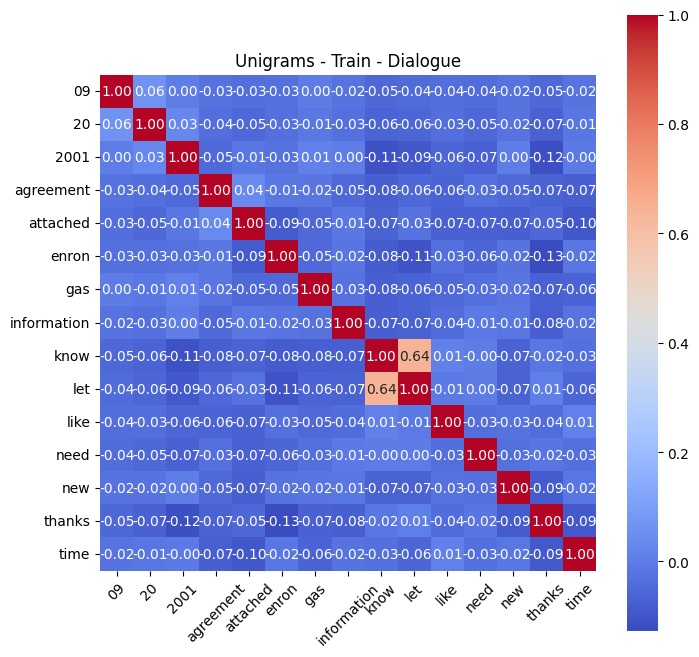

In [66]:
vectorizer = TfidfVectorizer(max_features = 15,stop_words = 'english') # Top 15 terms
x = vectorizer.fit_transform(pivot_df['body'])
df_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())
plot_correlation(df_tfidfvect, 'Unigrams', 'Train - Dialogue', 800, 800, 12)

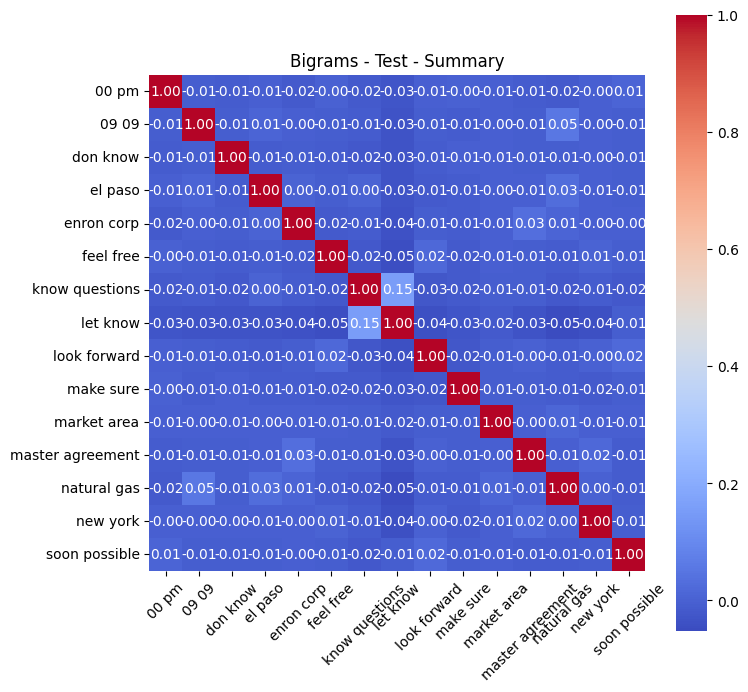

In [67]:
vectorizer = TfidfVectorizer(max_features = 15,stop_words = 'english',ngram_range = (2,2)) # Top 15 terms
x = vectorizer.fit_transform(train_df['body'].fillna(''))
df_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())
plot_correlation(df_tfidfvect, 'Bigrams', 'Test - Summary', 800, 800, 12)

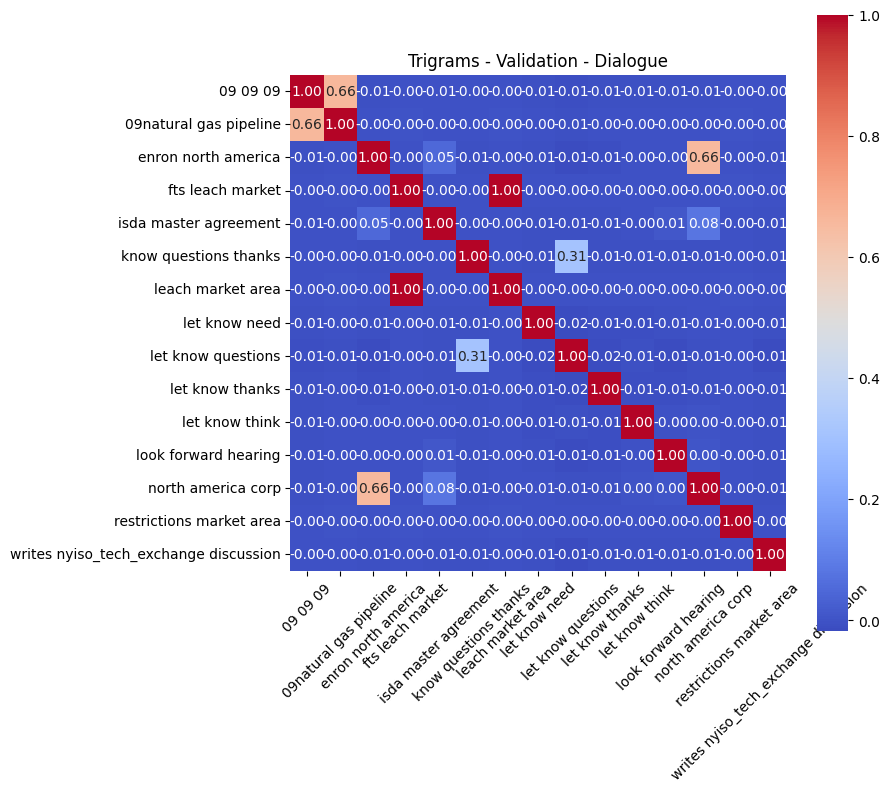

In [68]:

vectorizer = TfidfVectorizer(max_features = 15,stop_words = 'english',ngram_range = (3,3)) # Top 15 terms
x = vectorizer.fit_transform(pivot_df['body'].fillna(''))
df_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())
plot_correlation(df_tfidfvect, 'Trigrams', 'Validation - Dialogue', 800, 800, 12)

In [69]:
nan_rows = train_df[train_df.isna().any(axis=1)]


In [70]:
len(train_df['body'][0])


429

In [71]:
train_df['body'][0][0:2]

'Gr'

In [72]:
train_df['body'][1]

'Phillip & Keith  Attached is the first draw request, I will need some of these funds immediately.\nI think checks out of Bishops Corner, L.P. may be the easiest, or you can wire money to me and I can write the checks when needed.\nPlease let me know how you wish to handle this and I will proceed.\nAdditionally, it is getting close to closing.\nI will need to get contracts signed at this point as soon as possible.\nWe can handle this in two ways.\nI prefer that you elect me as a Vice - President of the General Partner and then I will sign all documents, or I can Federal Express contracts (this is more difficult).\nI have a funeral at 10:00 and I will be back about 1:00.\nI look forward to hearing from you.\nGreg     - Draw # 1 - 10.25.01.xls'

In [77]:
# Assuming your DataFrame is named 'data' with columns 'text' and 'label' (adjust names if needed)
text_data = train_df['body'].tolist()
summary_data = train_df['subject'].tolist()

In [78]:
len(text_data), len(summary_data)

(14436, 14436)

In [79]:
train_df

tag,source,body,subject,ann0,ann1,ann2,body_wcount,subj_wcount,cleaned_emails
0,allen-p_inbox_20,"Greg/Phillip, Attached is the Grande Communic...",Service Agreement,NaN,NaN,NaN,65,2,gregphillip attached is the grande communicati...
1,allen-p_inbox_28,Phillip & Keith Attached is the first draw re...,Bishops Corner,NaN,NaN,NaN,145,2,phillip keith attached is the first draw reque...
2,allen-p_inbox_63,Your Internet Banking accounts are now setup a...,Internet Banking,NaN,NaN,NaN,250,2,your internet banking accounts are now setup a...
3,allen-p_inbox_64,To our IBS Customers that are still hanging in...,Internet Banking,NaN,NaN,NaN,458,2,to our ibs customers that are still hanging in...
4,allen-p_inbox_65,Phillip Good Morning!\nI hope you had a wonder...,SMEs for expert stories,NaN,NaN,NaN,68,4,phillip good morning i hope you had a wonderfu...
...,...,...,...,...,...,...,...,...,...
14431,zufferli-j_inbox_43,This email is acknowledgement from the Power P...,Power Pool,NaN,NaN,NaN,227,2,this email is acknowledgement from the power p...
14432,zufferli-j_inbox_44,This email is acknowledgement from the Power P...,Power Pool of Alberta,NaN,NaN,NaN,277,4,this email is acknowledgement from the power p...
14433,zufferli-j_inbox_46,"John, Further to the voice message that I lef...",Enron Security,NaN,NaN,NaN,148,2,john further to the voice message that i left ...
14434,zufferli-j_inbox_8,Make sure that all curves are downloaded by th...,Simulation Curves,NaN,NaN,NaN,66,2,make sure that all curves are downloaded by th...


In [83]:
train_df.to_csv('train_emails.csv', index=False)

**TEST FOLDER**

In [92]:
test_loader = DirectoryLoader(path=test_path, glob="**/*.subject", silent_errors=True, show_progress=True, loader_cls=TextLoader)
test_email_docs = test_loader.load()

test_emails_df = load_and_process_directory(test_path)
test_df = test_emails_df.pivot(index='source', columns='tag', values='content').reset_index()

test_df = test_df.reindex(columns=desired_columns)

test_df['body_wcount'] = [len(x.split()) for x in test_df['body']]

test_df['subj_wcount'] = [len(x.split()) for x in test_df['subject']]

test_df['cleaned_emails'] = test_df['body'].apply(clean_text)


test_df.shape


100%|██████████| 1906/1906 [00:00<00:00, 14293.15it/s]


(1906, 9)

In [93]:
test_df

tag,source,body,subject,ann0,ann1,ann2,body_wcount,subj_wcount,cleaned_emails
0,allen-p_inbox_24,"Phillip, Could you please do me a favor?\nI ...",Huntley/question,"phillip, could you please do me a favor?",need to review your title policy's easements s...,need copy of title policy,70,1,phillip could you please do me a favor i would...
1,allen-p_inbox_45,The following reports have been waiting for yo...,Expense Reports Awaiting Your Approval,action needed re: reitmeyer report,report review reminder,still waiting for your report approvals,29,5,the following reports have been waiting for yo...
2,allen-p_inbox_6,We have for the last couple of weeks started t...,Re-start/Integration Planning,"time sensitive, re-start/integration plans needed",new focus: commercial plans,status of netco re-start/integration plans,263,2,we have for the last couple of weeks started t...
3,allen-p_inbox_66,Michelle Here are my very minor comments.\nHow...,RM Simulation Storyline Scripts - Ready for Le...,cnn type theme issues?,minor comments- promotions,some thoughts subsequent to sme meeting,164,9,michelle here are my very minor comments. howe...
4,allen-p_inbox_84,For purposes of an accelerated distribution fr...,Answer,psa decision and explanation,information regarding a psa account.,clarification regarding psa and single sum dis...,206,1,for purposes of an accelerated distribution fr...
...,...,...,...,...,...,...,...,...,...
1901,zipper-a_inbox_39,"Andy, Stephanie Sever has contacted ICE and h...",ICE,access list update,ice forms and access,ice access,40,1,andy stephanie sever has contacted ice and has...
1902,zipper-a_inbox_62,The following was developed in an effort to as...,Non-Exempt Scorecard,assistance for evaluation of non-exempt employees,assistance with evaluating non-exempt employees,non-exempt evaluation document,26,2,the following was developed in an effort to as...
1903,zipper-a_inbox_90,REMINDER: Your weekly update for Philippe and...,Weekly Reports are Due,weekly update - phil & greg,weekly update reminder,weekly reports due,26,4,reminder your weekly update for philippe and g...
1904,zufferli-j_inbox_1,"Please find attached the latest, and what shou...",Latest Marketing List,marketing list assignments,marketing list,marketing list attached,183,3,please find attached the latest and what shoul...


In [94]:
test_df.to_csv('test_emails.csv', index=False)